In [1]:
import pandas as pd
df = pd.read_parquet("C:/Users/bisar/My fitbit dashboard project/Daily Data/daily_summary.parquet")

In [2]:
df.head()

,date,calories,distance,steps,lightly_active_minutes,moderately_active_minutes,very_active_minutes,sedentary_minutes,total_active_minutes,active_sedentary_ratio,energy_movement_kpi
0,2025-05-04,1425.60,0.0,0.0,0.0,0.0,0.0,1440.0,0.0,0.000000,0.212161
1,2025-05-05,1813.57,398600.0,3869.0,138.0,2.0,12.0,1288.0,152.0,0.118012,0.518875
2,2025-05-06,1778.81,175551.0,1864.0,161.0,0.0,0.0,1279.0,161.0,0.125880,0.379481
3,2025-05-07,1828.60,401850.0,4352.0,169.0,5.0,8.0,1258.0,182.0,0.144674,0.537533
4,2025-05-08,1909.28,319459.0,3477.0,239.0,5.0,2.0,1194.0,246.0,0.206030,0.495677


## **KPI 1: Total active minutes (daily / weekly / monthly)**

**Weekly total_active_minutes**

In [ ]:
# Make sure 'date' column is datetime type and set as index
df.set_index('date', inplace=True)

weekly_active = df['total_active_minutes'].resample('W').sum()


In [6]:
weekly_active.head()

date
2025-05-04       0.0
2025-05-11    1241.0
2025-05-18    1326.0
2025-05-25    1281.0
2025-06-01     675.0
Freq: W-SUN, Name: total_active_minutes, dtype: float64

**Monthly total_active_minutes**

In [4]:
monthly_active = df['total_active_minutes'].resample('M').sum()


C:\Users\bisar\AppData\Local\Temp\ipykernel_3428\1723320528.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_active = df['total_active_minutes'].resample('M').sum()


date
2025-05-31    4327.0
2025-06-30    6153.0
2025-07-31    5252.0
2025-08-31    6203.0
2025-09-30    5158.0
2025-10-31    4690.0
2025-11-30    4416.0
2025-12-31    4748.0
2026-01-31     180.0
Freq: ME, Name: total_active_minutes, dtype: float64

In [7]:
monthly_active.head()

date
2025-05-31    4327.0
2025-06-30    6153.0
2025-07-31    5252.0
2025-08-31    6203.0
2025-09-30    5158.0
Freq: ME, Name: total_active_minutes, dtype: float64

## **KPI 2: Average Steps per Day**

In [9]:
avg_daily_steps = df["steps"].mean()
avg_daily_steps

np.float64(3737.3360655737706)

In [12]:
avg = df["steps"].sum()/len(df)

In [13]:
avg

np.float64(3737.3360655737706)

The average daily step count is approximately 3,737 steps, indicating a generally low to moderately active lifestyle with consistent daily movement rather than frequent high-intensity activity. Most days fall within the 2,000–4,000 step range, suggesting routine mobility driven by daily habits rather than structured exercise. Occasional high-step days create noticeable spikes but are not sustained, which explains why overall activity levels remain modest despite strong correlations with calories burned.

## **KPI 3: Calories burned per day**

In [15]:
# Daily calories summary
daily_calories = df["calories"]
daily_calories.describe()

count     244.000000
mean     1798.599385
std       145.340962
min      1412.460000
25%      1711.602500
50%      1783.445000
75%      1859.035000
max      2239.810000
Name: calories, dtype: float64

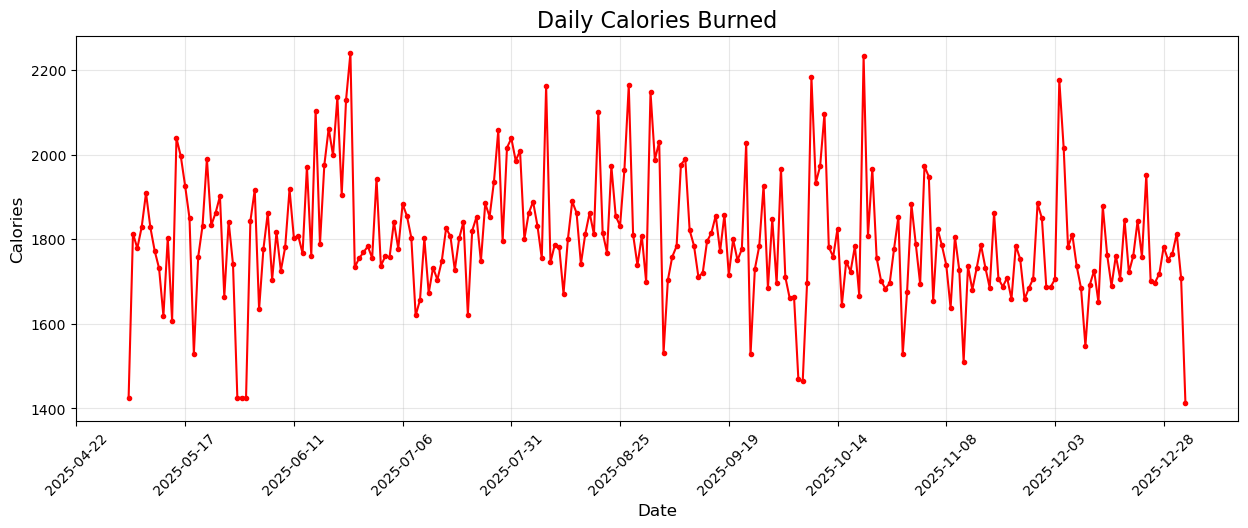

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(df.index, df["calories"], color="red", marker="o", markersize=3, linestyle="-")
plt.title("Daily Calories Burned", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Calories", fontsize=12)
plt.xticks(rotation=45)

# Optional: show x-ticks every month for clarity
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))

plt.grid(alpha=0.3)
plt.show()


I burn an average of ~1,799 calories daily, with most days falling between 1,712 and 1,859 calories. The minimum recorded was 1,412 calories, and the maximum reached 2,240 calories, showing that my daily energy expenditure is fairly consistent with occasional high-burn days likely linked to more activity.

## **KPI 4: Active/Sedentary Ratio**

In [18]:
df['active_sedentary_ratio'].describe()

count    244.000000
mean       0.135367
std        0.056891
min        0.000000
25%        0.100707
50%        0.130298
75%        0.157556
max        0.332100
Name: active_sedentary_ratio, dtype: float64

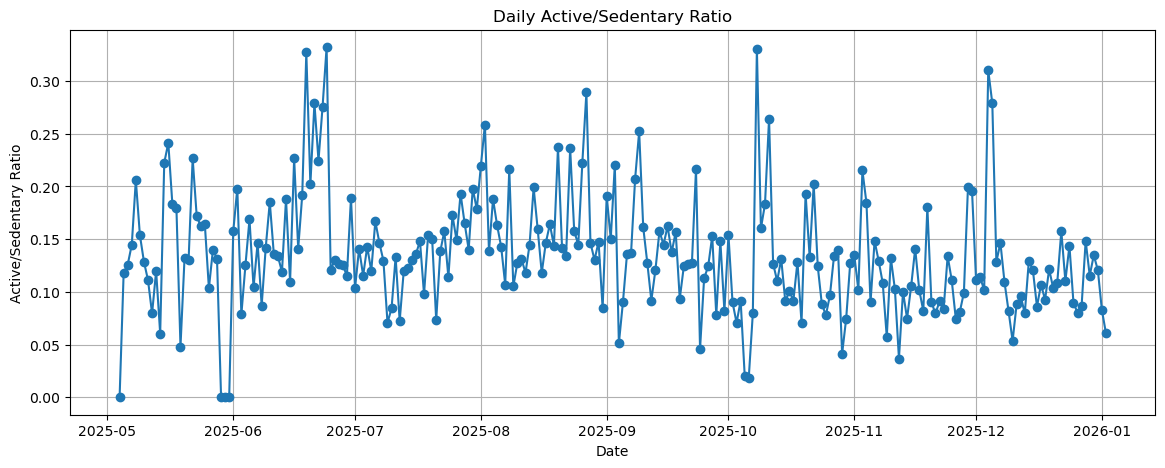

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,5))
plt.plot(df.index, df['active_sedentary_ratio'], marker='o', linestyle='-')
plt.title("Daily Active/Sedentary Ratio")
plt.xlabel("Date")
plt.ylabel("Active/Sedentary Ratio")
plt.grid(True)
plt.show()


My average active-to-sedentary ratio is ~0.135 (13.5%), meaning most of my day is sedentary. The ratio varies from 0% on completely inactive days up to 33% on my most active days, indicating that while there are spikes in activity, the majority of days have low activity relative to sedentary time.

## **KPI 5: Energy & Movement KPI**

In [21]:
# Descriptive statistics
df['energy_movement_kpi'].describe()


count    244.000000
mean       0.497898
std        0.126487
min        0.212161
25%        0.425666
50%        0.472736
75%        0.542786
max        0.980989
Name: energy_movement_kpi, dtype: float64

**Daily Energy & Movement KPI**

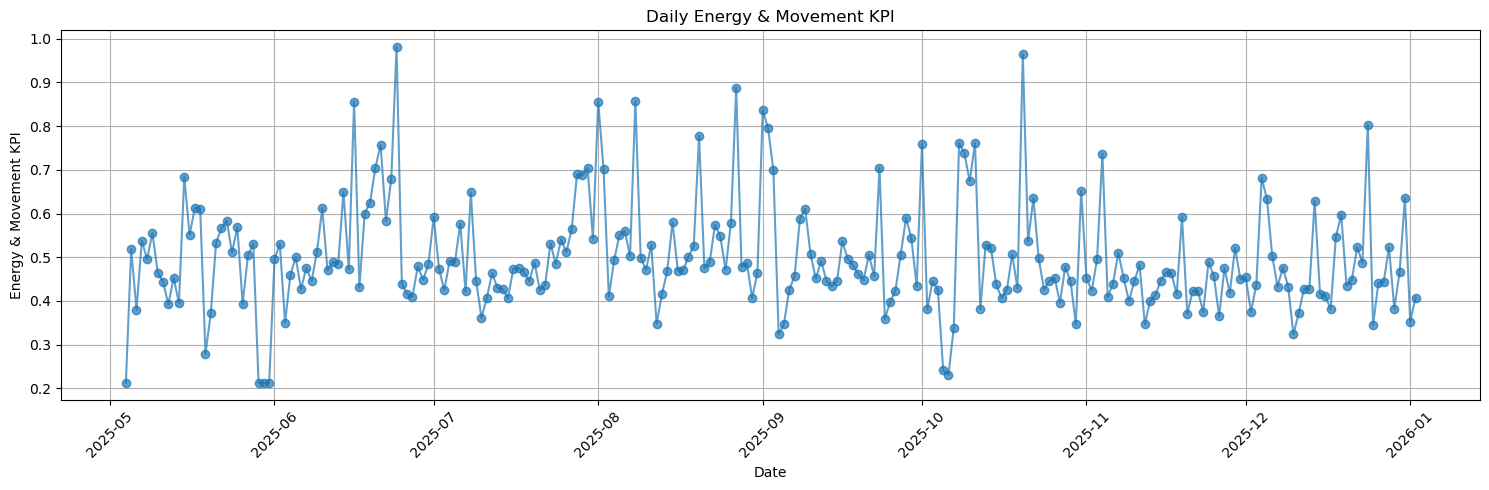

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(df.index, df['energy_movement_kpi'], marker='o', linestyle='-', alpha=0.7)
plt.title("Daily Energy & Movement KPI")
plt.xlabel("Date")
plt.ylabel("Energy & Movement KPI")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Weekly and Monthly Energy & Movement KPI**

In [24]:
weekly_kpi = df['energy_movement_kpi'].resample('W').mean()

# Monthly average Energy & Movement KPI
monthly_kpi = df['energy_movement_kpi'].resample('M').mean()

# Display first few rows
print("Weekly Energy & Movement KPI:\n", weekly_kpi.head())
print("\nMonthly Energy & Movement KPI:\n", monthly_kpi.head())

Weekly Energy & Movement KPI:
 date
2025-05-04    0.212161
2025-05-11    0.485174
2025-05-18    0.528491
2025-05-25    0.487639
2025-06-01    0.365581
Freq: W-SUN, Name: energy_movement_kpi, dtype: float64

Monthly Energy & Movement KPI:
 date
2025-05-31    0.456619
2025-06-30    0.542161
2025-07-31    0.500664
2025-08-31    0.543405
2025-09-30    0.506743
Freq: ME, Name: energy_movement_kpi, dtype: float64


C:\Users\bisar\AppData\Local\Temp\ipykernel_3428\3752799845.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_kpi = df['energy_movement_kpi'].resample('M').mean()


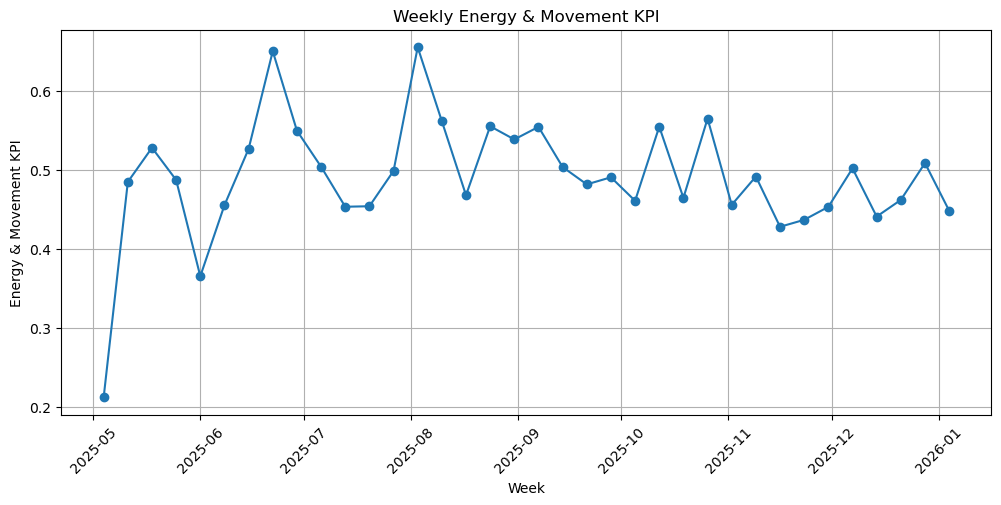

In [27]:
import matplotlib.pyplot as plt

# Weekly KPI plot
plt.figure(figsize=(12,5))
plt.plot(weekly_kpi, marker='o', linestyle='-')
plt.title("Weekly Energy & Movement KPI")
plt.xlabel("Week")
plt.ylabel("Energy & Movement KPI")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


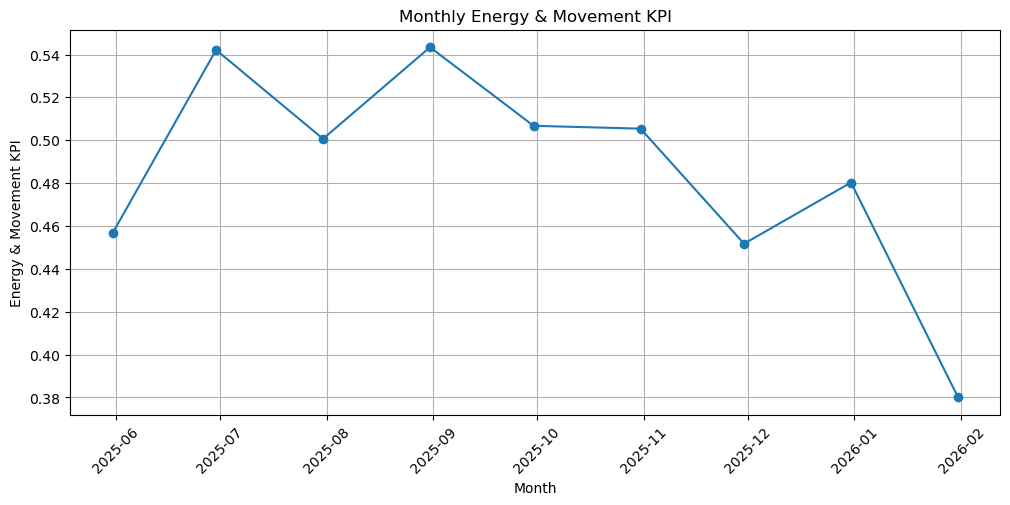

In [28]:
import matplotlib.pyplot as plt

# Monthly KPI plot
plt.figure(figsize=(12,5))
plt.plot(monthly_kpi, marker='o', linestyle='-')
plt.title("Monthly Energy & Movement KPI")
plt.xlabel("Month")
plt.ylabel("Energy & Movement KPI")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
